## Multiple Linear Regression Model for BoomBikes services

    - A multiple linear regression model will be created for BoomBikes services. 
    - Will check with the differrent features available in the dataset which is affecting our predictor variable 
    - i.e. 'cnt'
    - Variables Classifications :
    - numerical variables:
        - 'cnt', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered'
    - categorical variables:
        - 'season', 'yr', 'mnth', 'weekday', 'weathersit'
    - binary variables:
        - 'holiday', 'workingday'

## Reading, Understanding, EDA & Visualisation.

In [1]:
# loading the dataset using our python libraries by importing the libraries
# importing the libraries as & whenever required.

import pandas as pd
import numpy as np
import datetime

import sklearn
import statsmodels.api as sm

In [2]:
# loading the data using pandas

boombikes_df = pd.read_csv("/Users/ashutosh/UG/Linear_Regression/day.csv")

# after loading will just have look on the dataset
boombikes_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [3]:
# performing the EDA on the above dataset

# droping the variables which are not important for our analysis.
# 'instant' variable which just showcase the index & it won't help in our modeling.

if 'instant' in boombikes_df.columns:
    boombikes_df = boombikes_df.drop('instant', axis=1)

# we will drop 'dteday' columns to as we already have month & year columns for analysis.
if 'dteday' in boombikes_df.columns:
    boombikes_df = boombikes_df.drop('dteday', axis=1)

# we will map the categorical variables to their values mentioned in the data dictionary given.

# season (1:spring, 2:summer, 3:fall, 4:winter)
boombikes_df['season'] = boombikes_df['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4:'winter'})

# year:yr (0: 2018, 1:2019)
boombikes_df['yr'] = boombikes_df['yr'].map({0: '2018', 1: '2019'})

# month (1:January ... 12:December)
boombikes_df['mnth'] = boombikes_df['mnth'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'April', 5: 'May', 6: 'June',
                                                7: 'July', 8: 'Aug', 9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

# day of the week
# 0: Monday & so on. 
boombikes_df['weekday'] = boombikes_df['weekday'].map({0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thurs', 4: 'Fri', 
                                                       5: 'Sat', 6: 'Sun'})

# weathersit : 
# - 1: Clear, Few clouds, Partly cloudy, Partly cloudy ('Partly Cloudy')
# - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist (Mist)
# - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds (Low Rain)
# - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog (Not present in the dataset)  (Heavy Rain)
boombikes_df['weathersit'] = boombikes_df['weathersit'].map({1: 'Partly Cloudy', 2: 'Mist', 3: 'Low Rain', 
                                                       4: 'Heavy Rain'})

In [4]:
boombikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(5)
memory usage: 80.0+ KB


/Users/ashutosh/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


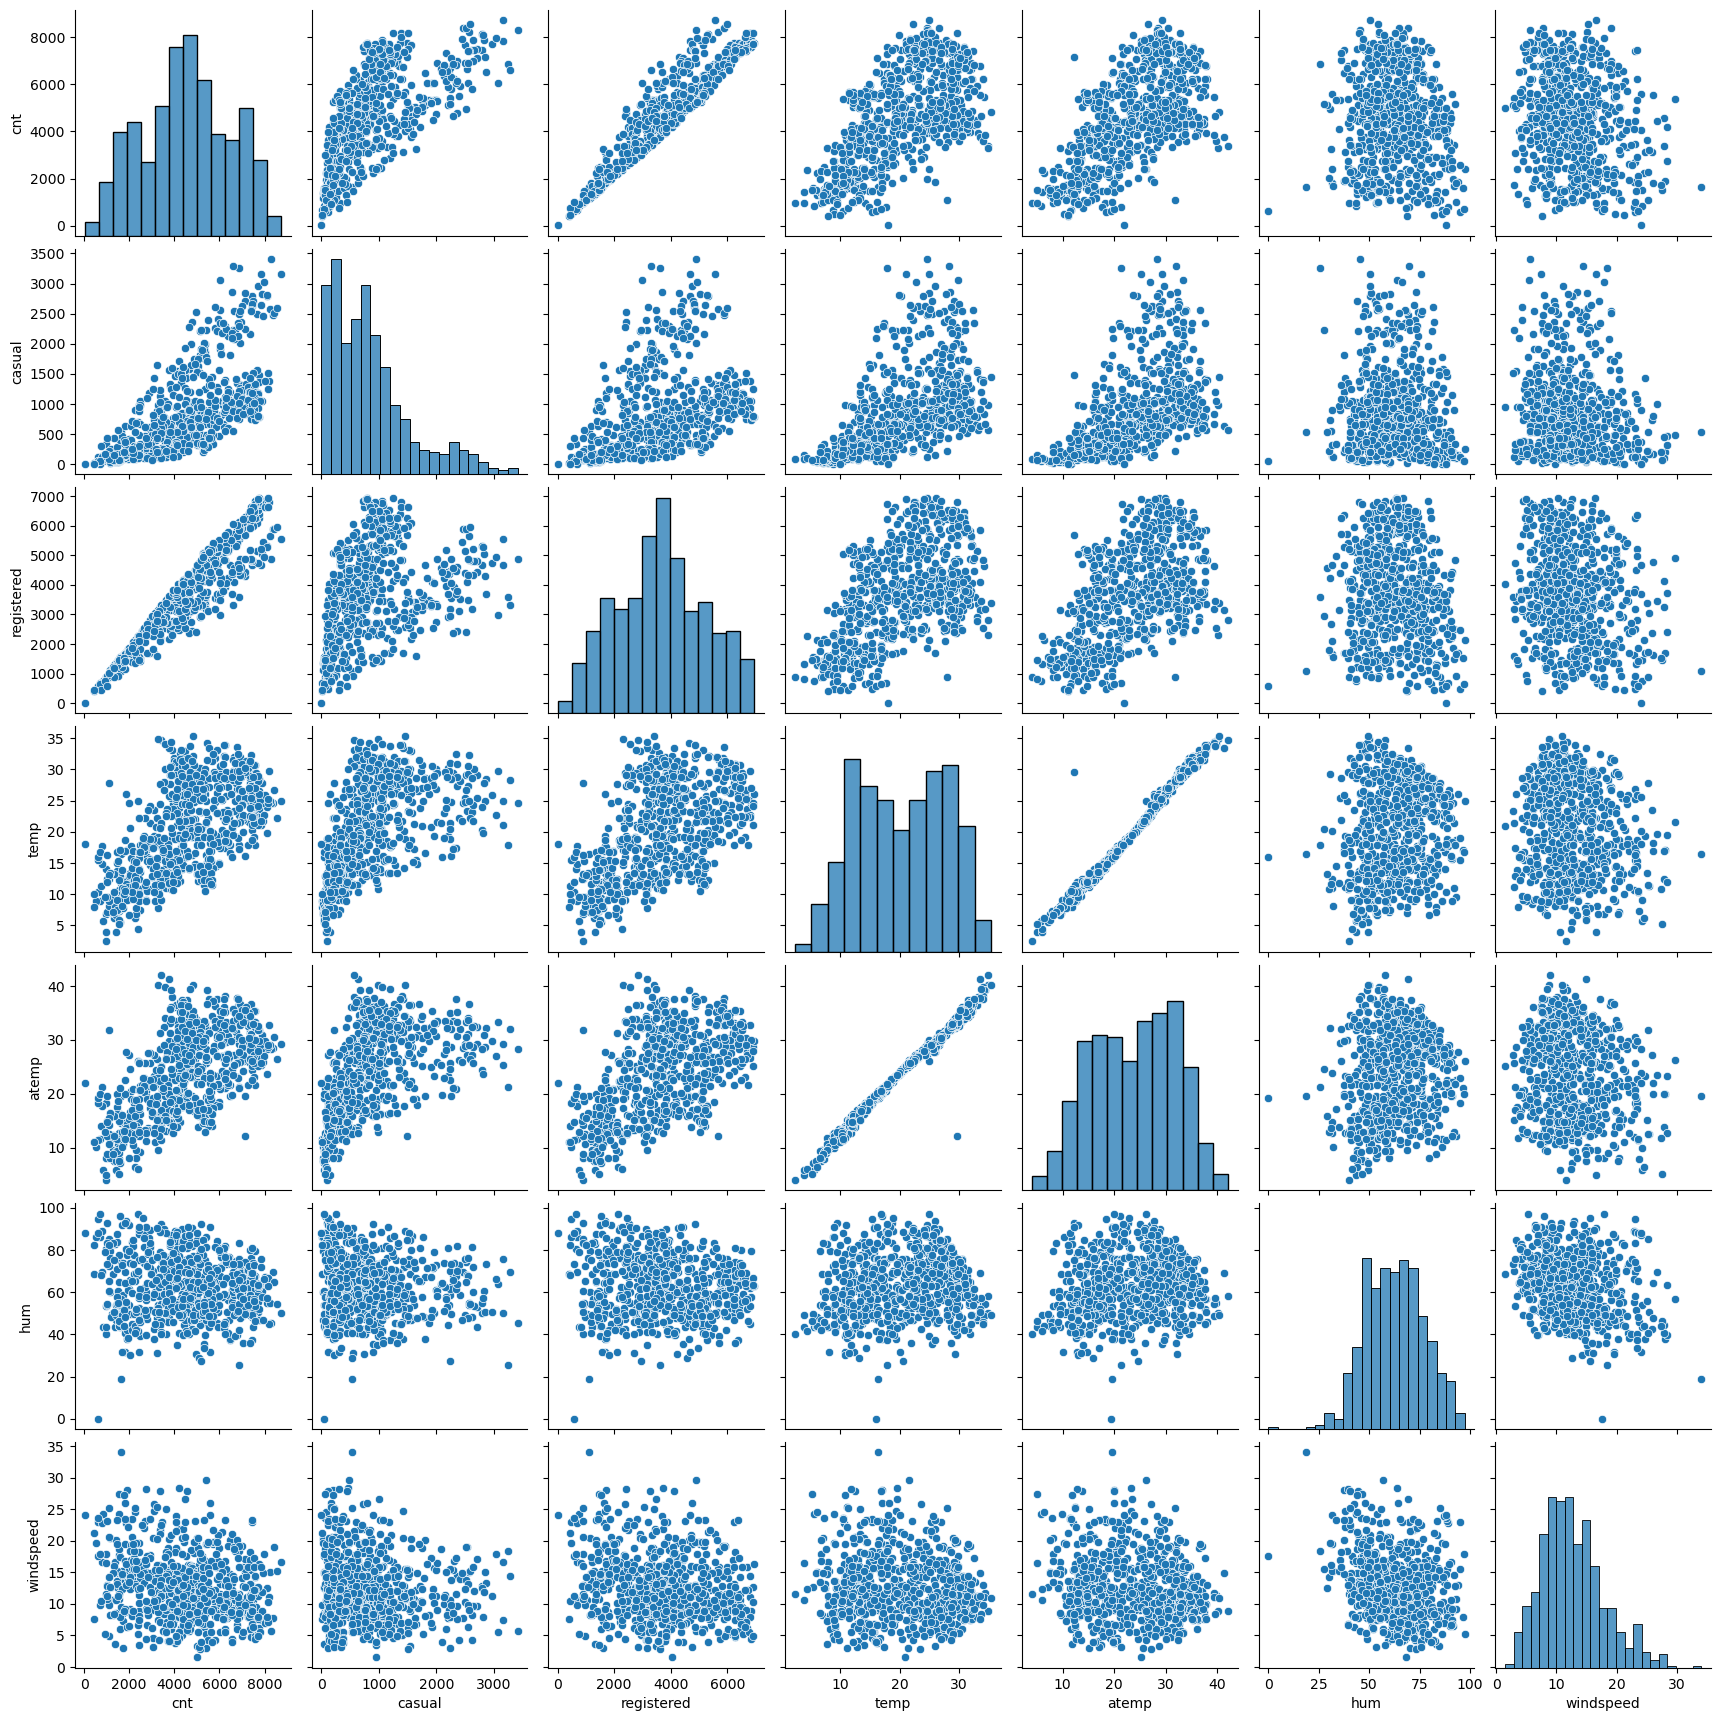

In [5]:
# visualising the numerical variables using the scatter plots
# importing the visualisation libraries as required

import matplotlib.pylab as plt
import seaborn as sns

sns.pairplot(boombikes_df[['cnt','casual', 'registered', 'temp', 'atemp', 'hum', 'windspeed']])
plt.show()

In [71]:
sns. __version__

'0.12.2'

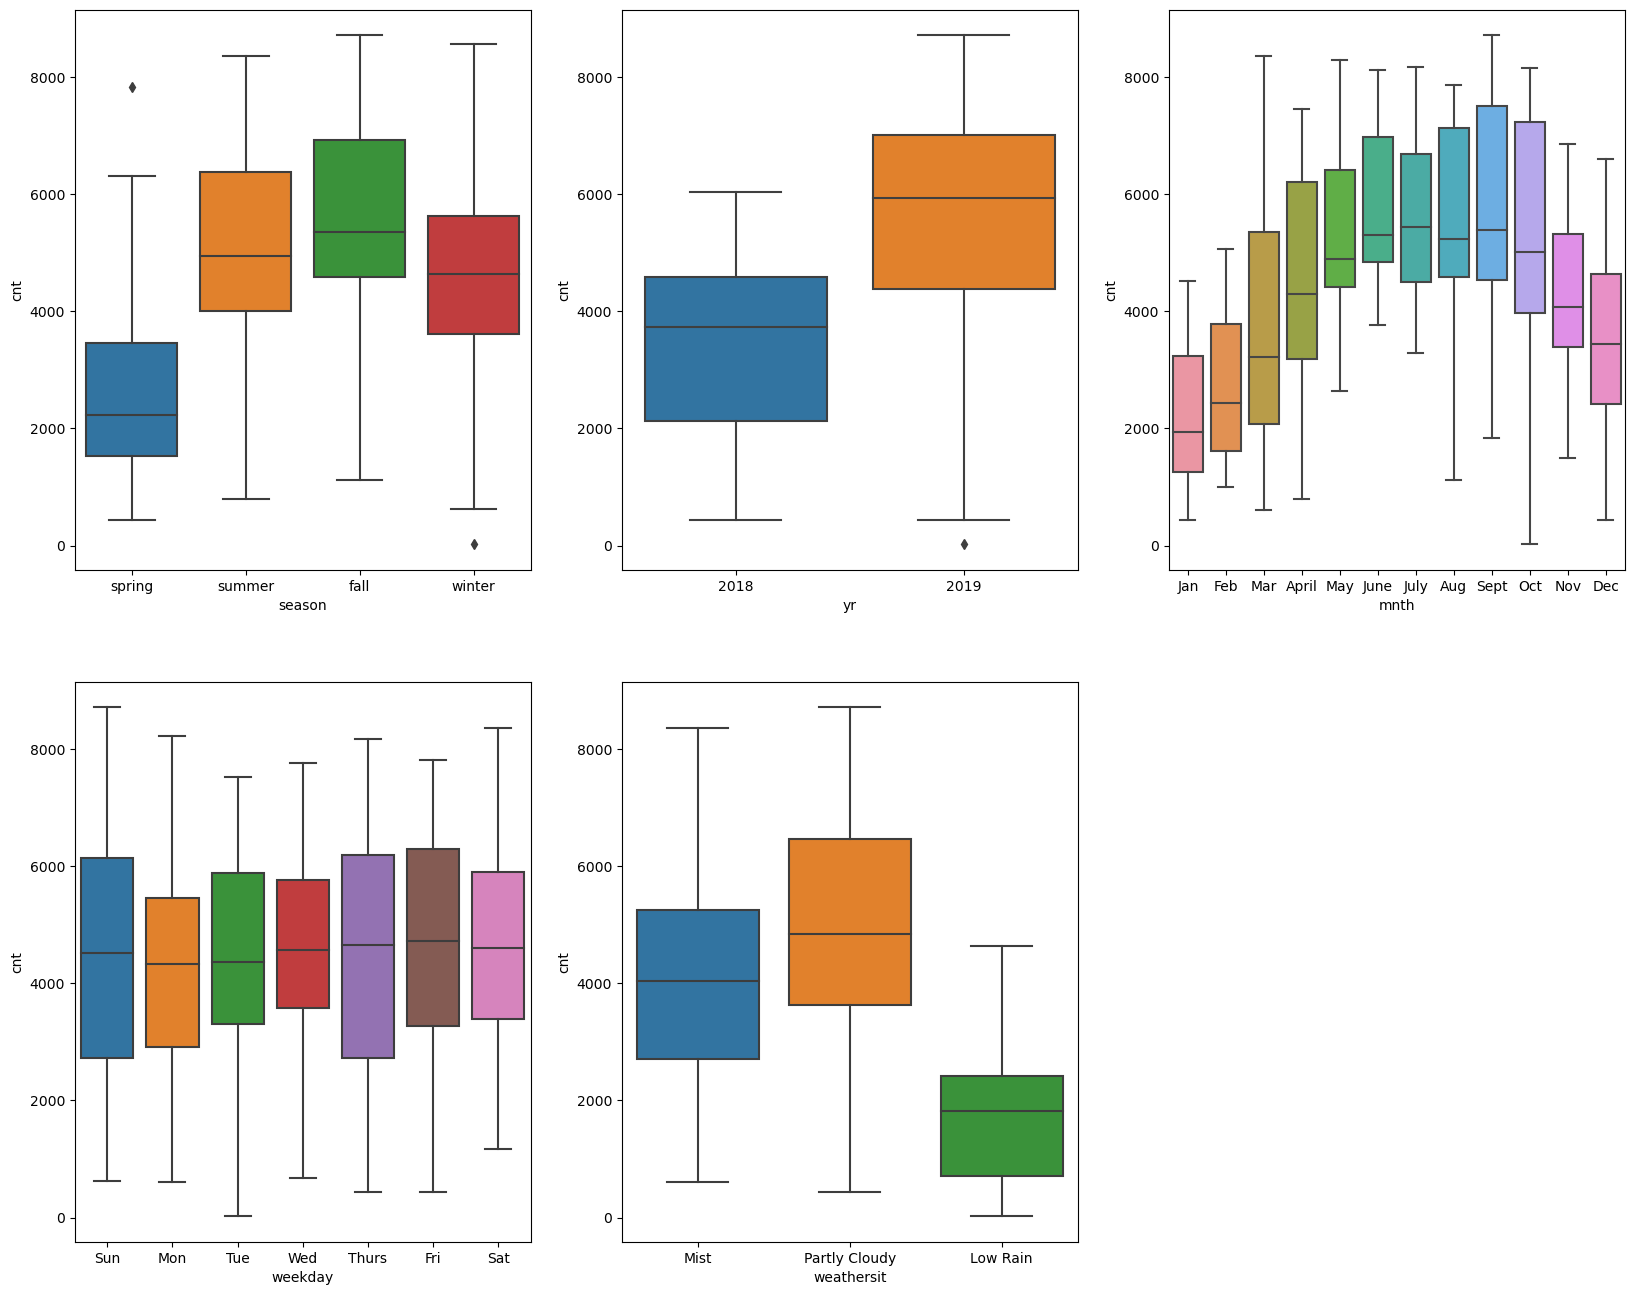

In [6]:
# visualising our categorical data with the total count of users (registered & casual)
# 'season', 'yr', 'mnth', 'weekday', 'weathersit'

plt.figure(figsize=(20, 16))

# season (1:spring, 2:summer, 3:fall, 4:winter)
plt.subplot(2, 3, 1)
sns.boxplot(x="season", y="cnt", data=boombikes_df)

# year:yr (0: 2018, 1:2019)
plt.subplot(2, 3, 2)
sns.boxplot(x="yr", y="cnt", data=boombikes_df)

# month (1 to 12)
plt.subplot(2, 3, 3)
sns.boxplot(x="mnth", y="cnt", data=boombikes_df)

# day of the week
# 0: Sunday & so on. 
plt.subplot(2, 3, 4)
sns.boxplot(x="weekday", y="cnt", data=boombikes_df)

# weathersit : 
# - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog (Not present in the dataset)
plt.subplot(2, 3, 5)
sns.boxplot(x="weathersit", y="cnt", data=boombikes_df)

plt.show()

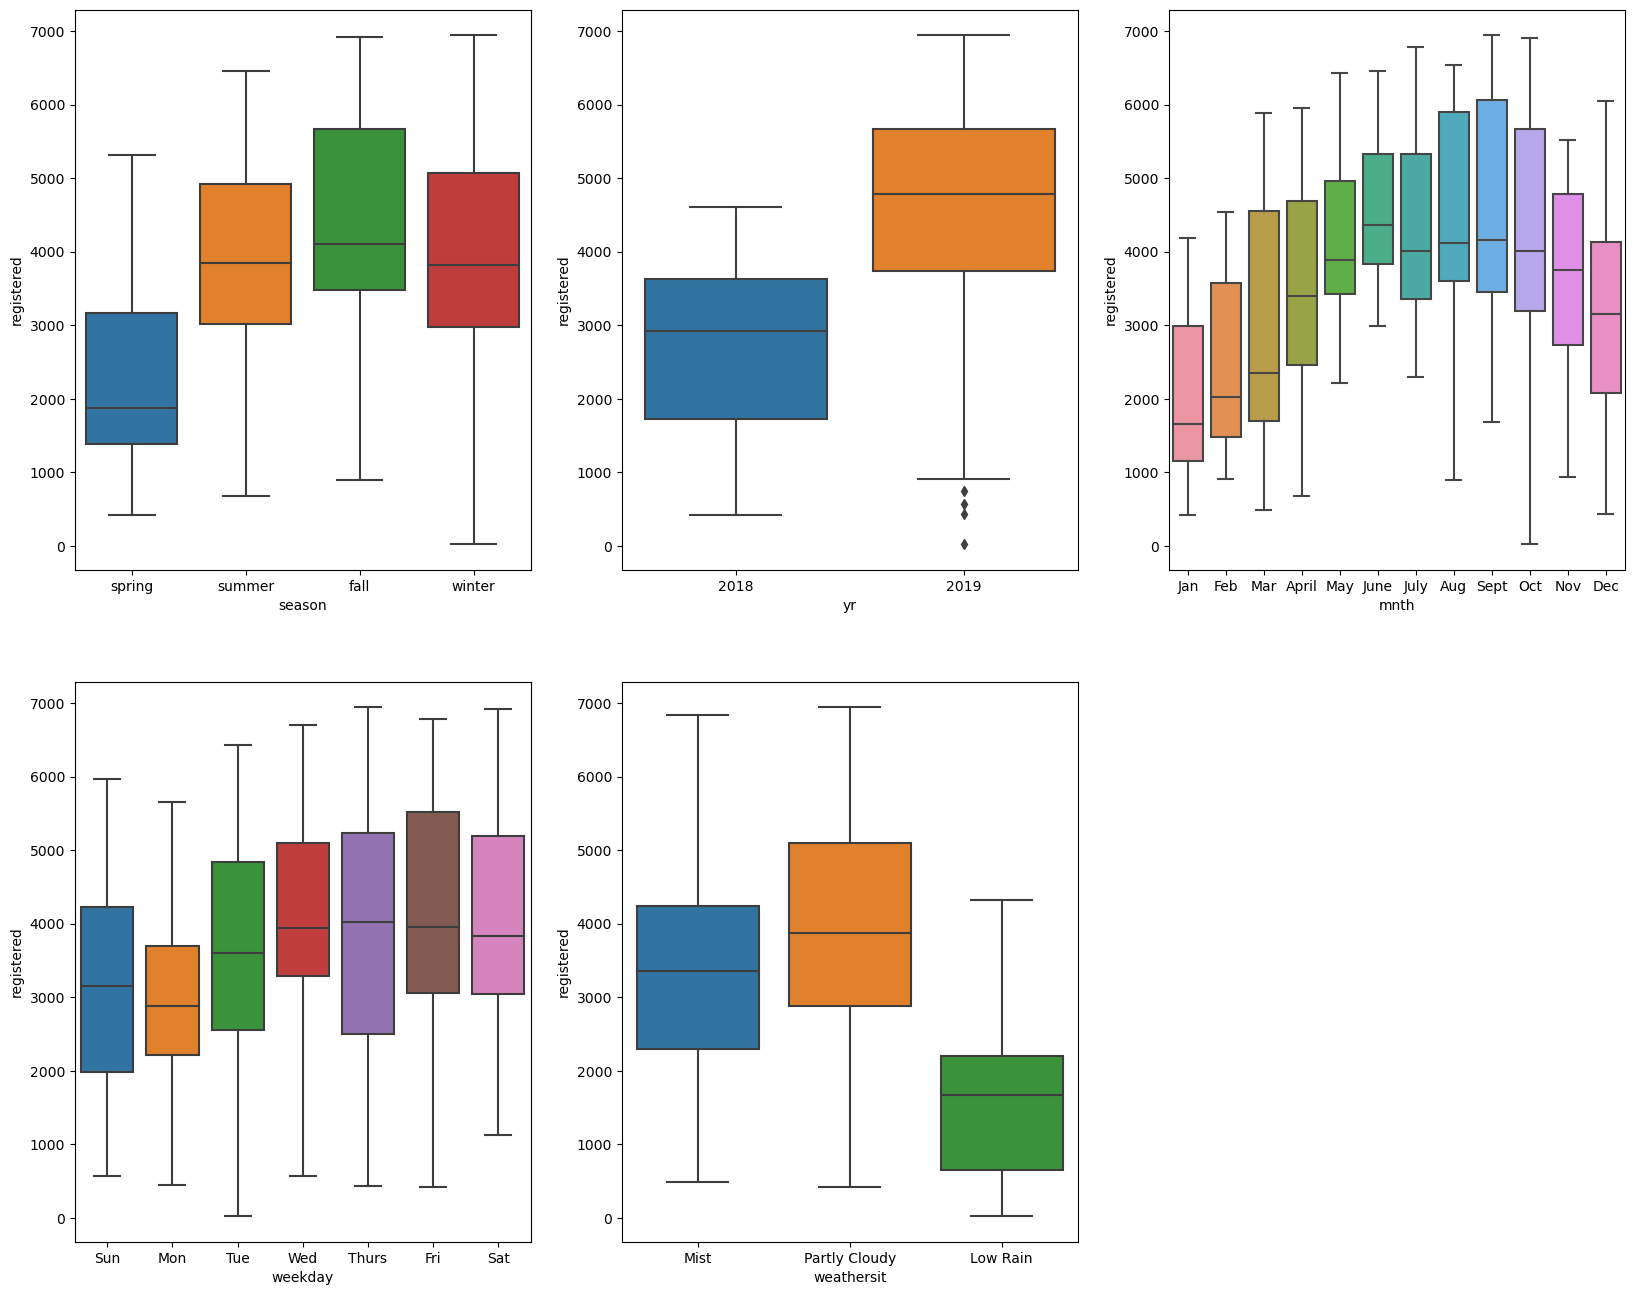

In [7]:
# visualising our categorical data with 'registered users'
# 'season', 'yr', 'mnth', 'weekday', 'weathersit'

plt.figure(figsize=(20, 16))

# season (1:spring, 2:summer, 3:fall, 4:winter)
plt.subplot(2, 3, 1)
sns.boxplot(x="season", y="registered", data=boombikes_df)

# year:yr (0: 2018, 1:2019)
plt.subplot(2, 3, 2)
sns.boxplot(x="yr", y="registered", data=boombikes_df)

# month (1 to 12)
plt.subplot(2, 3, 3)
sns.boxplot(x="mnth", y="registered", data=boombikes_df)

# day of the week
# 0 is treated as Sunday & so on. 
plt.subplot(2, 3, 4)
sns.boxplot(x="weekday", y="registered", data=boombikes_df)

# weathersit : 
# - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog (Not present in the dataset)
plt.subplot(2, 3, 5)
sns.boxplot(x="weathersit", y="registered", data=boombikes_df)

plt.show()

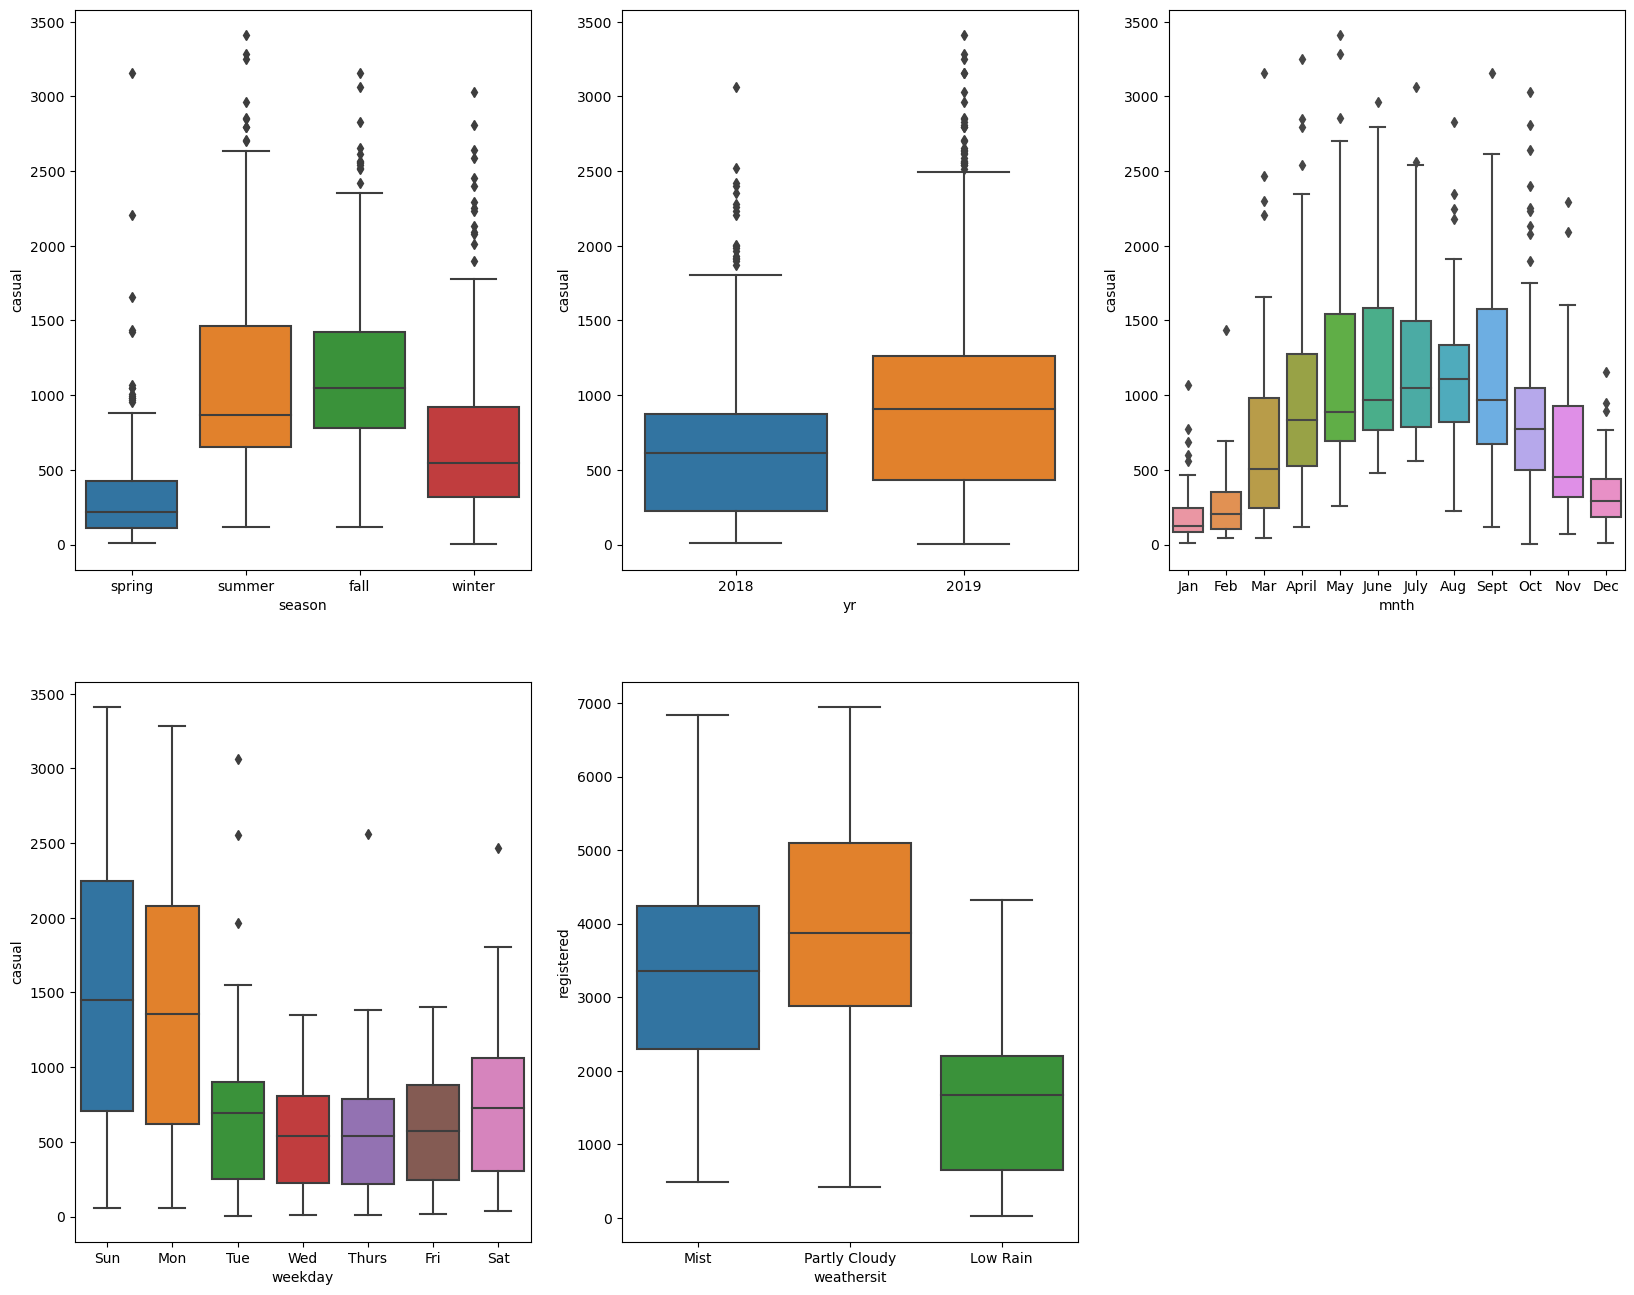

In [8]:
# visualising our categorical data with 'casual users'
# 'season', 'yr', 'mnth', 'weekday', 'weathersit'

plt.figure(figsize=(20, 16))

# season (1:spring, 2:summer, 3:fall, 4:winter)
plt.subplot(2, 3, 1)
sns.boxplot(x="season", y="casual", data=boombikes_df)

# year:yr (0: 2018, 1:2019)
plt.subplot(2, 3, 2)
sns.boxplot(x="yr", y="casual", data=boombikes_df)

# month (1 to 12)
plt.subplot(2, 3, 3)
sns.boxplot(x="mnth", y="casual", data=boombikes_df)

# day of the week
# 0 is treated as Sunday & so on. 
plt.subplot(2, 3, 4)
sns.boxplot(x="weekday", y="casual", data=boombikes_df)

# weathersit : 
# - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog (Not present in the dataset)
plt.subplot(2, 3, 5)
sns.boxplot(x="weathersit", y="registered", data=boombikes_df)

plt.show()

##  Data preparation for modeling
    - Encoding:
        - Converting binary variables to 1/0
        - Other categorical variables to dummy variables
    - Splitting into train & test
    - Rescalling of variables

- numerical variables:
    - 'cnt', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered'
- categorical variables:
    - 'season', 'yr', 'mnth', 'weekday', 'weathersit'
- binary variables:
    - 'holiday', 'workingday'

## ENCODING THE VARIABLES
### Dummy variables using One Hot Encoding technique

In [9]:
boombikes_df.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,2018,Jan,0,Sun,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,2018,Jan,0,Mon,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,2018,Jan,0,Tue,1,Partly Cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,2018,Jan,0,Wed,1,Partly Cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,2018,Jan,0,Thurs,1,Partly Cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,spring,2018,Jan,0,Fri,1,Partly Cloudy,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,spring,2018,Jan,0,Sat,1,Mist,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,spring,2018,Jan,0,Sun,0,Mist,6.765000,8.11270,53.5833,17.875868,68,891,959
8,spring,2018,Jan,0,Mon,0,Partly Cloudy,5.671653,5.80875,43.4167,24.250650,54,768,822
9,spring,2018,Jan,0,Tue,1,Partly Cloudy,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [10]:
# displaying all the unique values of our categorical variables
print(boombikes_df['season'].unique())
print(boombikes_df['yr'].unique())
print(boombikes_df['mnth'].unique())
print(boombikes_df['weekday'].unique())
print(boombikes_df['weathersit'].unique())

['spring' 'summer' 'fall' 'winter']
['2018' '2019']
['Jan' 'Feb' 'Mar' 'April' 'May' 'June' 'July' 'Aug' 'Sept' 'Oct' 'Nov'
 'Dec']
['Sun' 'Mon' 'Tue' 'Wed' 'Thurs' 'Fri' 'Sat']
['Mist' 'Partly Cloudy' 'Low Rain']


In [11]:
# Encoding the variables
# Let's convert the categorical variables to dummy variables so tht we can use them in our modeling.
# as MLR needs numerical data for performing modeling

# creating dummy variables for all of out categorical variables
dummy_new = pd.get_dummies(boombikes_df[['season', 'yr', 'mnth', 'weekday', 'weathersit']], 
                                dtype=int, drop_first=True)

In [12]:
# so using the 'One Hot Encoding' technique using pandas get_dummies() method to create 'n-1' dummy variables,
# we got the below output of dummy variables

dummy_new.head(10)

,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Mist,weathersit_Partly Cloudy
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
5,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
6,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
7,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
8,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
9,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


In [13]:
# Concat the dummy variables to our original dataframe i.e. 'boombikes_df'
boombikes_df = pd.concat([boombikes_df, dummy_new], axis=1)

# Drop the original categorical variables
boombikes_df = boombikes_df.drop(['season', 'yr', 'mnth', 'weekday', 'weathersit'], axis=1)

In [14]:
boombikes_df.head(10)

,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Mist,weathersit_Partly Cloudy
0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,985,1,...,0,0,0,0,1,0,0,0,1,0
1,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,1,...,0,0,1,0,0,0,0,0,1,0
2,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,...,0,0,0,0,0,0,1,0,0,1
3,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,...,0,0,0,0,0,0,0,1,0,1
4,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,...,0,0,0,0,0,1,0,0,0,1
5,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606,1,...,0,0,0,0,0,0,0,0,0,1
6,0,1,8.057402,10.44195,49.8696,11.304642,148,1362,1510,1,...,0,0,0,1,0,0,0,0,1,0
7,0,0,6.765000,8.11270,53.5833,17.875868,68,891,959,1,...,0,0,0,0,1,0,0,0,1,0
8,0,0,5.671653,5.80875,43.4167,24.250650,54,768,822,1,...,0,0,1,0,0,0,0,0,0,1
9,0,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321,1,...,0,0,0,0,0,0,1,0,0,1


## Splitting into train & test data

In [15]:
# for this will use sklearn library & their method train_test_split()
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(boombikes_df, train_size=0.7, test_size=0.3, random_state=100)

In [16]:
# Now let's standardise our dataset.
# For that will use MinMaxScaler method of sklearn.preprocessing which will get all our values between 0 and 1.

from sklearn.preprocessing import MinMaxScaler

# 1. Initialise the object
scaler = MinMaxScaler()

# create a list of numeric variables (we haven't involved the binary variable & categorical dummy variables)
num_vars = ['cnt','casual', 'registered', 'temp', 'atemp', 'hum', 'windspeed']

# 2. Fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Mist,weathersit_Partly Cloudy
653,0,1,0.509887,0.501133,0.575354,0.300794,0.280402,0.951776,0.864243,0,...,1,0,0,0,0,0,0,1,0,1
576,0,1,0.815169,0.766351,0.725633,0.264686,0.294422,0.899220,0.827658,0,...,0,0,0,0,0,0,0,1,0,1
426,0,0,0.442393,0.438975,0.640189,0.255342,0.290765,0.446145,0.465255,1,...,0,0,0,0,1,0,0,0,1,0
728,0,0,0.245101,0.200348,0.498067,0.663106,0.110332,0.203869,0.204096,1,...,0,0,1,0,0,0,0,0,0,1
482,0,0,0.395666,0.391735,0.504508,0.188475,0.340750,0.444701,0.482973,0,...,0,0,0,0,1,0,0,0,1,0


In [17]:
len(df_train.columns)
print(df_train.columns)

Index(['holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'season_spring', 'season_summer', 'season_winter',
       'yr_2019', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_July',
       'mnth_June', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct',
       'mnth_Sept', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thurs', 'weekday_Tue', 'weekday_Wed', 'weathersit_Mist',
       'weathersit_Partly Cloudy'],
      dtype='object')


In [18]:
# first will visualise a heatmap as we need to check the corelation 
# between the independent variable & dependent variable

df_train = df_train[['cnt','casual',
       'registered','holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
                     'season_spring', 'season_summer', 'season_winter',
       'yr_2019', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_July',
       'mnth_June', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct',
       'mnth_Sept', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thurs', 'weekday_Tue', 'weekday_Wed', 'weathersit_Mist',
       'weathersit_Partly Cloudy']]

In [19]:
df_train.head(10)

,cnt,casual,registered,holiday,workingday,temp,atemp,hum,windspeed,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Mist,weathersit_Partly Cloudy
653,0.864243,0.280402,0.951776,0,1,0.509887,0.501133,0.575354,0.300794,0,...,1,0,0,0,0,0,0,1,0,1
576,0.827658,0.294422,0.899220,0,1,0.815169,0.766351,0.725633,0.264686,0,...,0,0,0,0,0,0,0,1,0,1
426,0.465255,0.290765,0.446145,0,0,0.442393,0.438975,0.640189,0.255342,1,...,0,0,0,0,1,0,0,0,1,0
728,0.204096,0.110332,0.203869,0,0,0.245101,0.200348,0.498067,0.663106,1,...,0,0,1,0,0,0,0,0,0,1
482,0.482973,0.340750,0.444701,0,0,0.395666,0.391735,0.504508,0.188475,0,...,0,0,0,0,1,0,0,0,1,0
111,0.191095,0.053337,0.214554,0,1,0.345824,0.318819,0.751824,0.380981,0,...,0,0,0,1,0,0,0,0,1,0
580,0.782559,0.714112,0.643806,0,0,0.914852,0.882350,0.632030,0.462538,0,...,0,0,0,0,1,0,0,0,0,1
500,0.851588,0.301432,0.925931,0,1,0.719639,0.678508,0.719193,0.172431,0,...,0,0,0,0,0,1,0,0,0,1
479,0.710308,0.199025,0.797141,0,1,0.520271,0.513565,0.440962,0.164434,0,...,0,0,0,0,0,1,0,0,0,1
472,0.499885,0.105151,0.577534,0,1,0.503656,0.496135,0.586518,0.270032,0,...,0,0,0,0,0,1,0,0,1,0


## Training the Model

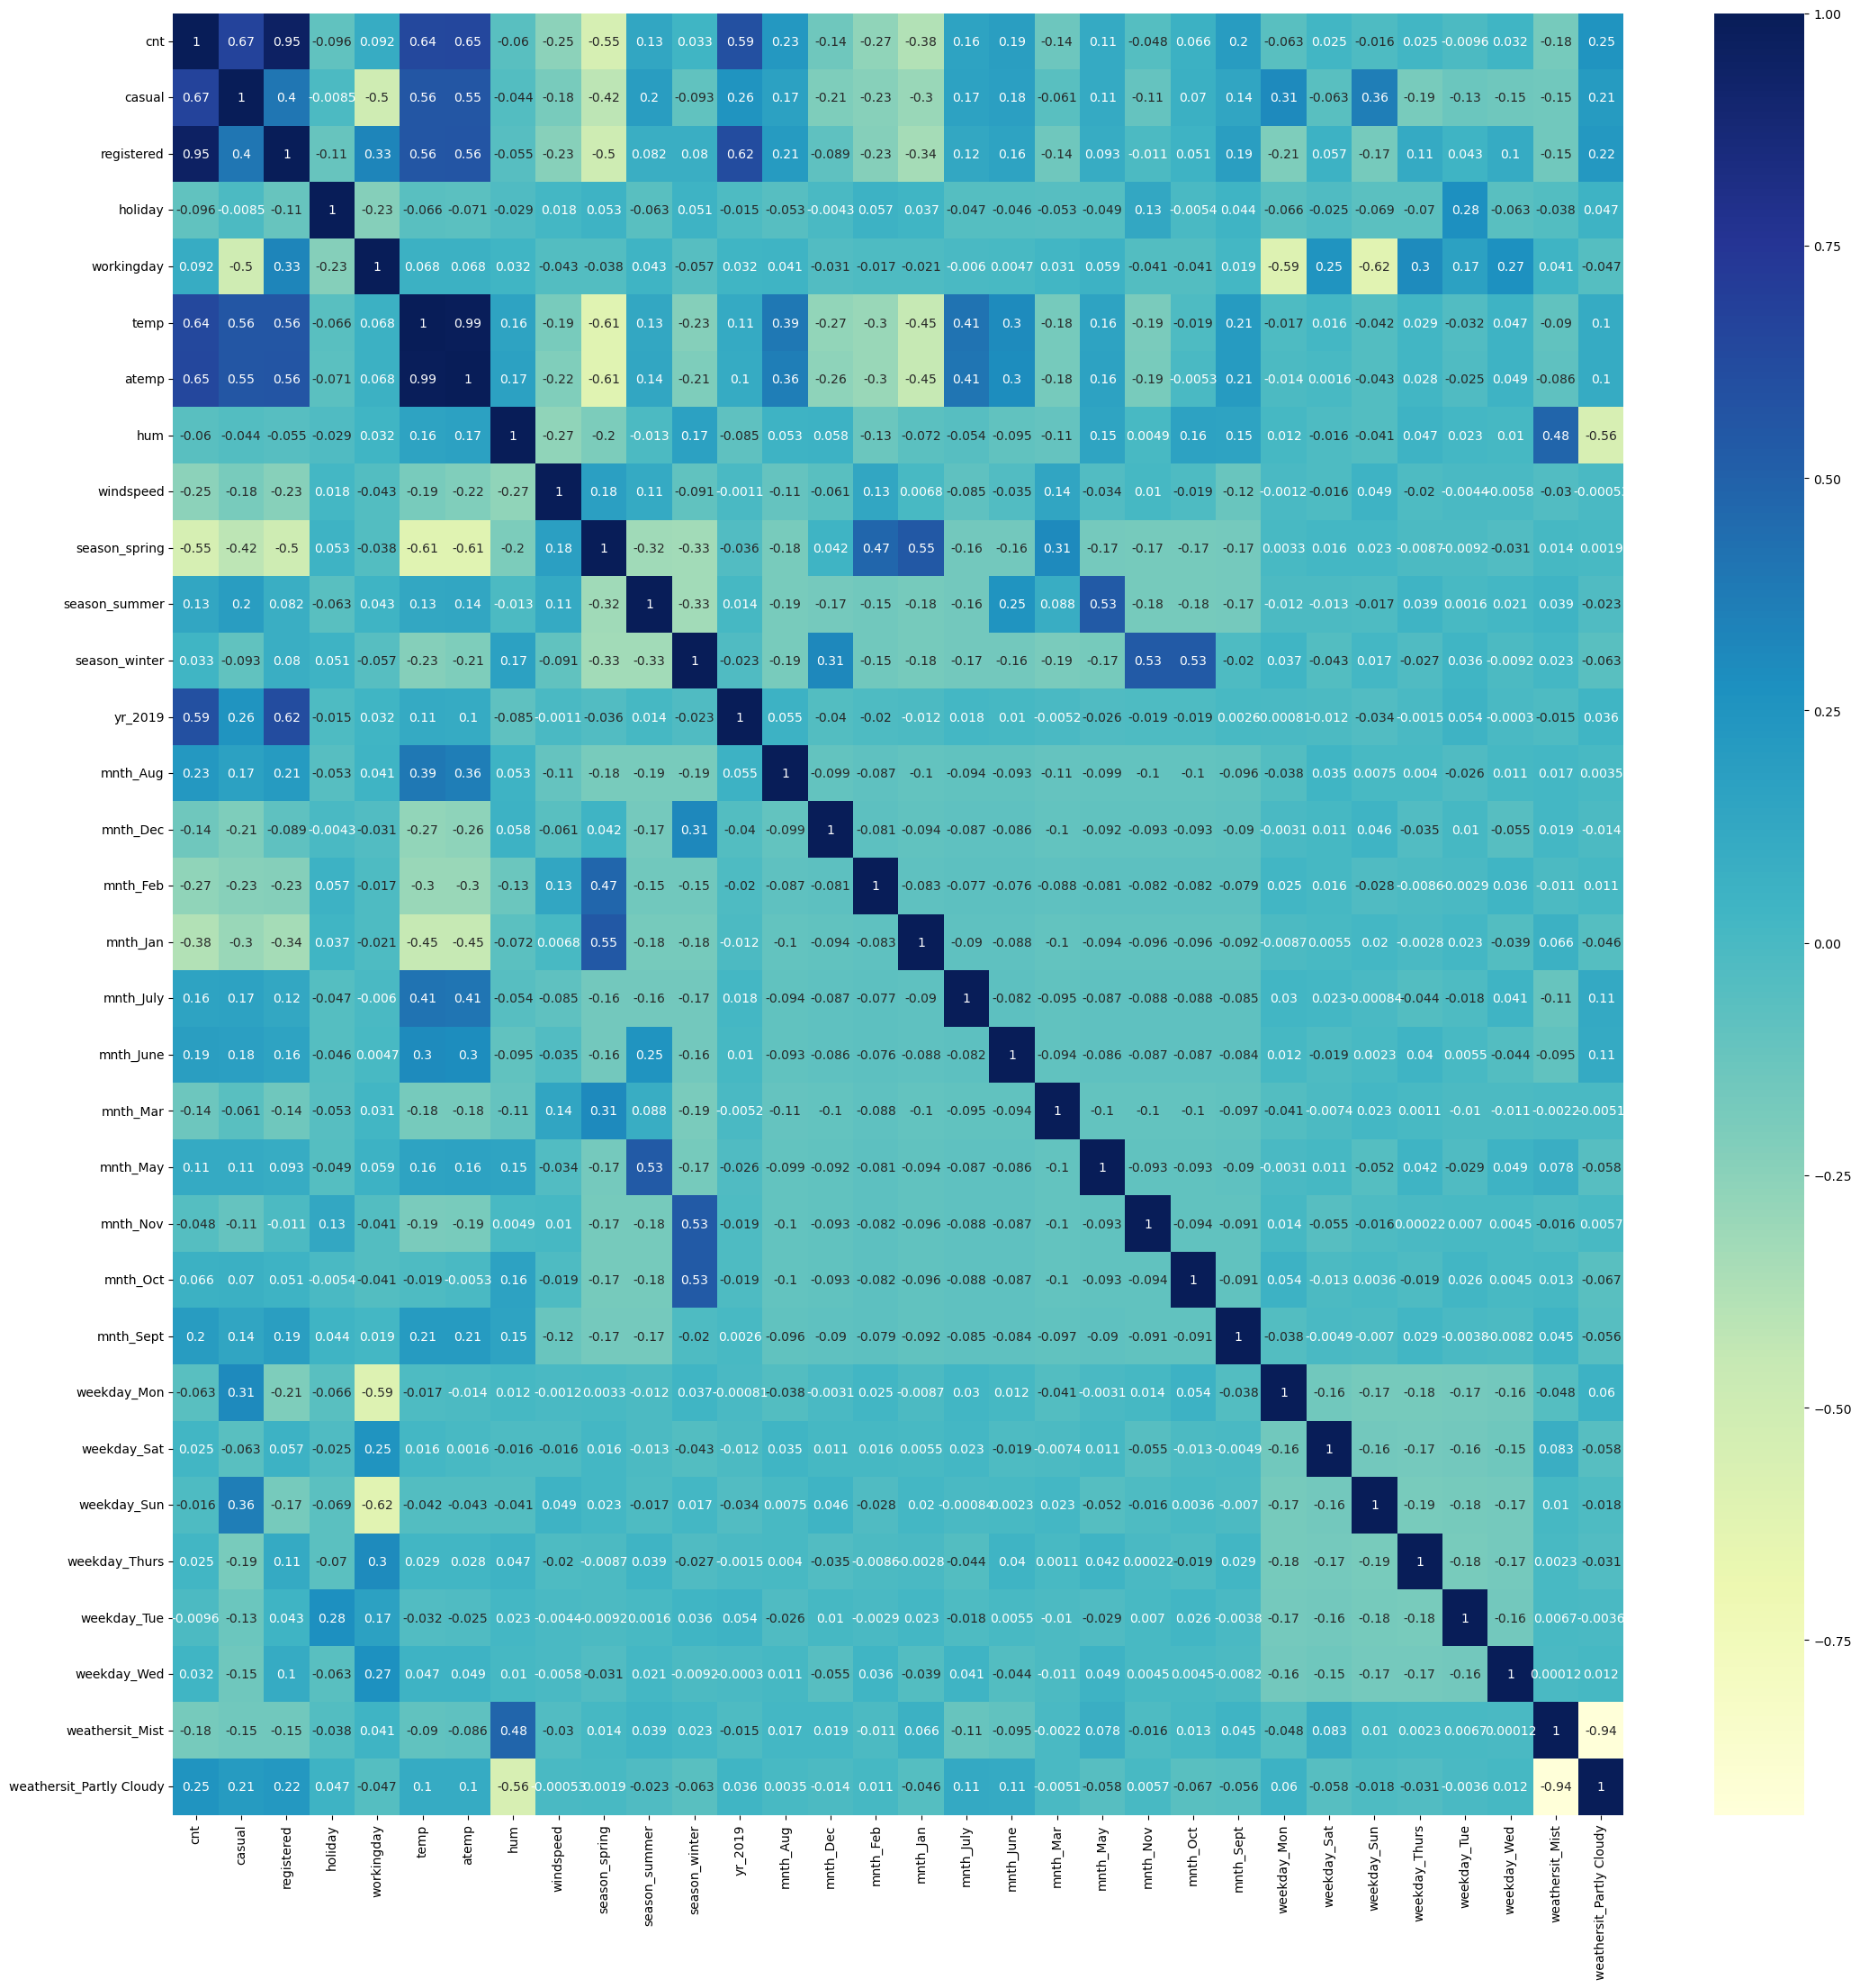

In [20]:
# first we will draw a heatmap as we need to check the corelation 
# between the independent variable & dependent variable

plt.figure(figsize=(26, 26))
sns.heatmap(df_train.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [21]:
# X_train, y_train

y_train = df_train.pop('cnt')
X_train = df_train

In [22]:
# will check first with our highly corelated variable i.e. 'registered'

# add a constant
X_train_sm = sm.add_constant(X_train['registered'])

# create model
lr = sm.OLS(y_train, X_train_sm)

# fit the model
lr_model = lr.fit()

# summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     4541.
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          1.75e-255
Time:                        22:53:04   Log-Likelihood:                 624.12
No. Observations:                 510   AIC:                            -1244.
Df Residuals:                     508   BIC:                            -1236.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0245      0.008      3.099      0.002       0.009       0.040
registered     0.9335      0.014     67.388      0.000       0.906       0.961
==============================================================================
Omnibus:                      134.360   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              255.307
Skew:                           1.511   Prob(JB):                     3.64e-56
Kurtosis:                       4.699   Cond. No.                         5.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- as we can see that we have R-squared value of 0.899 which is highly significant & it also shows that our 
- dependent variable is highly corelated to each other
- but we cannot justify with only 1 variable.
- so we will go further & keep adding 1 variable at a time to check how our model is working.

In [23]:
# will add 1 more variable now which highly correlated i.e. 'casual'

# add a constant
X_train_sm = sm.add_constant(X_train[['registered', 'casual']])

# create model
lr = sm.OLS(y_train, X_train_sm)

# fit the model
lr_model = lr.fit()

# summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.933e+32
Date:                Wed, 13 Mar 2024   Prob (F-statistic):               0.00
Time:                        22:53:04   Log-Likelihood:                 17584.
No. Observations:                 510   AIC:                        -3.516e+04
Df Residuals:                     507   BIC:                        -3.515e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.995e-16   2.89e-17    -10.373      0.000   -3.56e-16   -2.43e-16
registered     0.7968   5.46e-17   1.46e+16      0.000       0.797       0.797
casual         0.3775   6.05e-17   6.24e+15      0.000       0.377       0.377
==============================================================================
Omnibus:                       86.915   Durbin-Watson:                   0.395
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.200
Skew:                          -1.120   Prob(JB):                     3.24e-29
Kurtosis:                       4.077   Cond. No.                         7.06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- over here we can observe a multicollinearity issue in our modeling
- so we will drop one of our variable & check again.

In [24]:
# will just check with 'casual' variable that how significant it is & weather we can keep it or drop it.

# add a constant
X_train_sm = sm.add_constant(X_train['casual'])

# create model
lr = sm.OLS(y_train, X_train_sm)

# fit the model
lr_model = lr.fit()

# summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     415.7
Date:                Wed, 13 Mar 2024   Prob (F-statistic):           5.90e-68
Time:                        22:53:04   Log-Likelihood:                 190.96
No. Observations:                 510   AIC:                            -377.9
Df Residuals:                     508   BIC:                            -369.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3274      0.012     27.873      0.000       0.304       0.350
casual         0.7313      0.036     20.388      0.000       0.661       0.802
==============================================================================
Omnibus:                       54.342   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.388
Skew:                           0.216   Prob(JB):                     6.16e-05
Kurtosis:                       2.149   Cond. No.                         5.19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- over here we can observe the R-squared value of 0.450 which means 45% of the variability observed in the dependent variable
- but in our first model much more high R-squared value so with this we drop this variable
- also this variable is creating multicollinearity issue in our model.

In [25]:
# will now add 1 more variable now which highly correlated i.e. 'atemp'

# add a constant
X_train_sm = sm.add_constant(X_train[['registered', 'atemp']])

# create model
lr = sm.OLS(y_train, X_train_sm)

# fit the model
lr_model = lr.fit()

# summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     2854.
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          1.18e-276
Time:                        22:53:04   Log-Likelihood:                 677.62
No. Observations:                 510   AIC:                            -1349.
Df Residuals:                     507   BIC:                            -1337.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0177      0.008     -2.174      0.030      -0.034      -0.002
registered     0.8414      0.015     55.775      0.000       0.812       0.871
atemp          0.1763      0.016     10.879      0.000       0.144       0.208
==============================================================================
Omnibus:                      143.934   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              300.083
Skew:                           1.539   Prob(JB):                     6.88e-66
Kurtosis:                       5.156   Cond. No.                         8.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- over here we can observe the R-squared value is extremly good i.e. 0.918
- we can say that 'atemp' variables is also statistically significant till now.

In [26]:
# now will add 1 more variable now which highly correlated i.e. 'temp'

# add a constant
X_train_sm = sm.add_constant(X_train[['registered', 'atemp', 'temp']])

# create model
lr = sm.OLS(y_train, X_train_sm)

# fit the model
lr_model = lr.fit()

# summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     1905.
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          3.35e-275
Time:                        22:53:04   Log-Likelihood:                 678.38
No. Observations:                 510   AIC:                            -1349.
Df Residuals:                     506   BIC:                            -1332.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0173      0.008     -2.133      0.033      -0.033      -0.001
registered     0.8411      0.015     55.778      0.000       0.811       0.871
atemp          0.0634      0.093      0.680      0.497      -0.120       0.247
temp           0.1075      0.087      1.230      0.219      -0.064       0.279
==============================================================================
Omnibus:                      146.197   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              310.337
Skew:                           1.551   Prob(JB):                     4.08e-68
Kurtosis:                       5.232   Cond. No.                         61.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- over here we don't have much change in R-squared value but the p-value we observe.
- p-value for 'atemp' variable is 0.497 as compared to our other variables which is not statistically significant.
- so we will drop the 'atemp' variable here & add another list of variables which are corelated.

In [27]:
# till now in our analysis we have only two significant variables i.e. 'registered', 'temp'
# we have drop the variables 'casual' & 'atemp' from our analysis.
# now we will add all the variables which are corelated & will remove variables at a time which has high p-value.

# add a constant
X_train_sm = sm.add_constant(X_train[['holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'registered', 'season_spring', 'season_summer', 'season_winter',
       'yr_2019', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_July',
       'mnth_June', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct',
       'mnth_Sept', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thurs', 'weekday_Tue', 'weekday_Wed', 'weathersit_Mist',
       'weathersit_Partly Cloudy']])

# create model
lr = sm.OLS(y_train, X_train_sm)

# fit the model
lr_model = lr.fit()

# summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     624.3
Date:                Wed, 13 Mar 2024   Prob (F-statistic):               0.00
Time:                        22:53:04   Log-Likelihood:                 961.66
No. Observations:                 510   AIC:                            -1865.
Df Residuals:                     481   BIC:                            -1743.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0187      0.018      1.018      0.309      -0.017       0.055
holiday                     -0.0064      0.011     -0.600      0.549      -0.027       0.015
workingday                  -0.0677      0.006    -10.833      0.000      -0.080      -0.055
temp                         0.1270      0.021      6.050      0.000       0.086       0.168
hum                         -0.0323      0.017     -1.940      0.053      -0.065       0.000
windspeed                   -0.0506      0.011     -4.449      0.000      -0.073      -0.028
registered                   0.9155      0.020     46.412      0.000       0.877       0.954
season_spring                0.0037      0.013      0.288      0.773      -0.022       0.029
season_summer                0.0257      0.011      2.294      0.022       0.004       0.048
season_winter               -0.0152      0.012     -1.245      0.214      -0.039       0.009
yr_2019                      0.0017      0.006      0.287      0.774      -0.010       0.014
mnth_Aug                    -0.0107      0.014     -0.746      0.456      -0.039       0.018
mnth_Dec                    -0.0200      0.014     -1.389      0.165      -0.048       0.008
mnth_Feb                    -0.0191      0.014     -1.361      0.174      -0.047       0.008
mnth_Jan                    -0.0154      0.014     -1.074      0.283      -0.044       0.013
mnth_July                   -0.0189      0.015     -1.258      0.209      -0.048       0.011
mnth_June                   -0.0200      0.011     -1.862      0.063      -0.041       0.001
mnth_Mar                     0.0041      0.010      0.391      0.696      -0.017       0.025
mnth_May                    -0.0123      0.009     -1.363      0.173      -0.030       0.005
mnth_Nov                     0.0009      0.016      0.057      0.955      -0.030       0.031
mnth_Oct                     0.0236      0.015      1.544      0.123      -0.006       0.054
mnth_Sept                    0.0036      0.014      0.265      0.791      -0.023       0.031
weekday_Mon                  0.0428      0.007      6.444      0.000       0.030       0.056
weekday_Sat                  0.0185      0.007      2.791      0.005       0.005       0.032
weekday_Sun                  0.0500      0.006      7.915      0.000       0.038       0.062
weekday_Thurs               -0.0058      0.006     -0.923      0.356      -0.018       0.007
weekday_Tue                  0.0049      0.006      0.758      0.449      -0.008       0.018
weekday_Wed                 -0.0038      0.007     -0.572      0.567      -0.017       0.009
weathersit_Mist              0.0128      0.011      1.124      0.262      -0.010       0.035
weathersit_Partly Cloudy     0.0198      0.012      1.602      0.110      -0.004       0.044
==============

- Now we added all the variables in our modeling.
- We have statistically significant R-squared value but we can observe that we have high p-value for some of the independent variables
- we will drop the variables with high p-value after checking the VIF i.e. Variable Inflation Factor
- High p-value, High VIF (remove them)
- High-low
    - High p, low VIF : remove these first
    - Low p, High VIF: remove these after the ones above
- Low p, Low VIF (Keep such variables)

In [28]:
# will use the statsmodel library to check VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X_train.drop(['casual', 'atemp'], axis=1, inplace=True) # we drop our 2 columns which are not siginificant
vif['Factors'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Factors,VIF
2,workingday,128.44
23,weekday_Sun,29.04
21,weekday_Mon,27.51
28,weathersit_Partly Cloudy,12.76
6,season_spring,10.87
27,weathersit_Mist,10.42
8,season_winter,9.96
7,season_summer,8.29
3,temp,8.00
0,registered,7.21


In [29]:
# First will check for significance level of High p-value > 0.05 & significance level of High VIF > 10
# we can see 'season_spring' has p-value of 0.777 & also the VIF is 10.87 which is high.
# will drop this

In [30]:
if 'season_spring' in X_train.columns:
    X_train.drop('season_spring', axis=1, inplace=True)

In [31]:
# add a constant
X_train_sm = sm.add_constant(X_train[['holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'registered', 'season_summer', 'season_winter',
       'yr_2019', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_July',
       'mnth_June', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct',
       'mnth_Sept', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thurs', 'weekday_Tue', 'weekday_Wed', 'weathersit_Mist',
       'weathersit_Partly Cloudy']])

# create model
lr = sm.OLS(y_train, X_train_sm)

# fit the model
lr_model = lr.fit()

# summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     648.7
Date:                Wed, 13 Mar 2024   Prob (F-statistic):               0.00
Time:                        22:53:04   Log-Likelihood:                 961.61
No. Observations:                 510   AIC:                            -1867.
Df Residuals:                     482   BIC:                            -1749.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0204      0.017      1.167      0.244      -0.014       0.055
holiday                     -0.0060      0.011     -0.567      0.571      -0.027       0.015
workingday                  -0.0673      0.006    -11.069      0.000      -0.079      -0.055
temp                         0.1265      0.021      6.054      0.000       0.085       0.168
hum                         -0.0322      0.017     -1.935      0.054      -0.065       0.000
windspeed                   -0.0504      0.011     -4.444      0.000      -0.073      -0.028
registered                   0.9151      0.020     46.607      0.000       0.876       0.954
season_summer                0.0236      0.009      2.776      0.006       0.007       0.040
season_winter               -0.0172      0.010     -1.709      0.088      -0.037       0.003
yr_2019                      0.0019      0.006      0.314      0.754      -0.010       0.014
mnth_Aug                    -0.0126      0.013     -0.978      0.329      -0.038       0.013
mnth_Dec                    -0.0196      0.014     -1.372      0.171      -0.048       0.008
mnth_Feb                    -0.0177      0.013     -1.347      0.179      -0.044       0.008
mnth_Jan                    -0.0141      0.014     -1.038      0.300      -0.041       0.013
mnth_July                   -0.0207      0.014     -1.526      0.128      -0.047       0.006
mnth_June                   -0.0205      0.011     -1.946      0.052      -0.041       0.000
mnth_Mar                     0.0051      0.010      0.509      0.611      -0.014       0.025
mnth_May                    -0.0121      0.009     -1.351      0.177      -0.030       0.006
mnth_Nov                     0.0008      0.016      0.049      0.961      -0.030       0.031
mnth_Oct                     0.0236      0.015      1.544      0.123      -0.006       0.054
mnth_Sept                    0.0022      0.013      0.172      0.864      -0.023       0.027
weekday_Mon                  0.0432      0.007      6.646      0.000       0.030       0.056
weekday_Sat                  0.0185      0.007      2.797      0.005       0.006       0.032
weekday_Sun                  0.0504      0.006      8.243      0.000       0.038       0.062
weekday_Thurs               -0.0057      0.006     -0.914      0.361      -0.018       0.007
weekday_Tue                  0.0049      0.006      0.756      0.450      -0.008       0.018
weekday_Wed                 -0.0037      0.007     -0.570      0.569      -0.017       0.009
weathersit_Mist              0.0131      0.011      1.153      0.250      -0.009       0.035
weathersit_Partly Cloudy     0.0202      0.012      1.639      0.102      -0.004       0.044
==============================================================================
Omnibus:                    

- we can straight away see that we multicollinearity issue still in our model from the above error message in point no.2
- The smallest eigenvalue is 1.17e-27 which indicates the eigenvalues of the correlation matrix of the predictor variables can provide insights into multicollinearity.

In [32]:
# now lets check for VIF

vif = pd.DataFrame()
vif['Factors'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Factors,VIF
2,workingday,116.09
22,weekday_Sun,26.12
20,weekday_Mon,24.96
27,weathersit_Partly Cloudy,12.64
26,weathersit_Mist,10.35
3,temp,7.94
0,registered,7.16
17,mnth_Nov,6.81
7,season_winter,6.77
18,mnth_Oct,6.59


In [33]:
# again we will repeat the above steps
# we will now drop 'weathersit_Partly Cloudy' variable as it has the high p-value of 0.102 and high VIF of 12.64
# considering the same significance level above

if 'weathersit_Partly Cloudy' in X_train.columns:
    X_train.drop('weathersit_Partly Cloudy', axis=1, inplace=True)

In [34]:
# again will check for p-values

# add a constant
X_train_sm = sm.add_constant(X_train[['holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'registered', 'season_summer', 'season_winter',
       'yr_2019', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_July',
       'mnth_June', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct',
       'mnth_Sept', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thurs', 'weekday_Tue', 'weekday_Wed', 'weathersit_Mist']])

# create model
lr = sm.OLS(y_train, X_train_sm)

# fit the model
lr_model = lr.fit()

# summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     671.2
Date:                Wed, 13 Mar 2024   Prob (F-statistic):               0.00
Time:                        22:53:04   Log-Likelihood:                 960.19
No. Observations:                 510   AIC:                            -1866.
Df Residuals:                     483   BIC:                            -1752.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0370      0.014      2.590      0.010       0.009       0.065
holiday            -0.0010      0.010     -0.098      0.922      -0.021       0.019
workingday         -0.0651      0.006    -10.964      0.000      -0.077      -0.053
temp                0.1254      0.021      5.998      0.000       0.084       0.167
hum                -0.0402      0.016     -2.523      0.012      -0.071      -0.009
windspeed          -0.0514      0.011     -4.526      0.000      -0.074      -0.029
registered          0.9282      0.018     51.718      0.000       0.893       0.963
season_summer       0.0232      0.009      2.719      0.007       0.006       0.040
season_winter      -0.0193      0.010     -1.932      0.054      -0.039       0.000
yr_2019            -0.0014      0.006     -0.247      0.805      -0.013       0.010
mnth_Aug           -0.0136      0.013     -1.053      0.293      -0.039       0.012
mnth_Dec           -0.0180      0.014     -1.257      0.209      -0.046       0.010
mnth_Feb           -0.0165      0.013     -1.256      0.210      -0.042       0.009
mnth_Jan           -0.0117      0.014     -0.865      0.388      -0.038       0.015
mnth_July          -0.0217      0.014     -1.601      0.110      -0.048       0.005
mnth_June          -0.0213      0.011     -2.018      0.044      -0.042      -0.001
mnth_Mar            0.0056      0.010      0.561      0.575      -0.014       0.025
mnth_May           -0.0121      0.009     -1.345      0.179      -0.030       0.006
mnth_Nov            0.0019      0.016      0.122      0.903      -0.029       0.032
mnth_Oct            0.0233      0.015      1.521      0.129      -0.007       0.053
mnth_Sept           0.0005      0.013      0.040      0.968      -0.025       0.026
weekday_Mon         0.0486      0.006      8.615      0.000       0.037       0.060
weekday_Sat         0.0192      0.007      2.892      0.004       0.006       0.032
weekday_Sun         0.0544      0.006      9.681      0.000       0.043       0.065
weekday_Thurs      -0.0060      0.006     -0.956      0.340      -0.018       0.006
weekday_Tue         0.0055      0.006      0.856      0.393      -0.007       0.018
weekday_Wed        -0.0031      0.007     -0.469      0.639      -0.016       0.010
weathersit_Mist    -0.0042      0.004     -0.982      0.327      -0.013       0.004
==============================================================================
Omnibus:                       73.306   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.691
Skew:                           0.848   Prob(JB):                     9.32e-30
Kurtosis:                       4.848   Cond. No.                     1.20e+15
==============================================================================

Note

In [35]:
# now lets check for VIF

vif = pd.DataFrame()
vif['Factors'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Factors,VIF
2,workingday,84.16
22,weekday_Sun,17.40
20,weekday_Mon,15.81
3,temp,7.93
17,mnth_Nov,6.80
7,season_winter,6.66
18,mnth_Oct,6.59
0,registered,5.96
10,mnth_Dec,5.62
12,mnth_Jan,5.22


- now from above we can see that VIF has been reduced drastically & we don't have high p-values for high VIF.
- we will now check for 
- High-low
    - High p, low VIF : remove these first
    - Low p, High VIF: remove these after the ones above

In [36]:
# We have 'mnth_Sept' variable for high-p & low VIF, so we will drop this first

if 'mnth_Sept' in X_train.columns:
    X_train.drop('mnth_Sept', axis=1, inplace=True)

In [37]:
# let's check again for p-values 

# add a constant
X_train_sm = sm.add_constant(X_train[['holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'registered', 'season_summer', 'season_winter',
       'yr_2019', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_July',
       'mnth_June', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thurs', 'weekday_Tue', 'weekday_Wed', 'weathersit_Mist']])

# create model
lr = sm.OLS(y_train, X_train_sm)

# fit the model
lr_model = lr.fit()

# summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     699.5
Date:                Wed, 13 Mar 2024   Prob (F-statistic):               0.00
Time:                        22:53:04   Log-Likelihood:                 960.19
No. Observations:                 510   AIC:                            -1868.
Df Residuals:                     484   BIC:                            -1758.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0371      0.014      2.726      0.007       0.010       0.064
holiday            -0.0009      0.010     -0.093      0.926      -0.021       0.019
workingday         -0.0650      0.006    -11.058      0.000      -0.077      -0.053
temp                0.1256      0.021      6.069      0.000       0.085       0.166
hum                -0.0401      0.016     -2.545      0.011      -0.071      -0.009
windspeed          -0.0514      0.011     -4.537      0.000      -0.074      -0.029
registered          0.9283      0.018     52.329      0.000       0.893       0.963
season_summer       0.0229      0.006      3.575      0.000       0.010       0.036
season_winter      -0.0193      0.010     -1.940      0.053      -0.039       0.000
yr_2019            -0.0014      0.006     -0.257      0.798      -0.012       0.010
mnth_Aug           -0.0140      0.008     -1.705      0.089      -0.030       0.002
mnth_Dec           -0.0183      0.011     -1.643      0.101      -0.040       0.004
mnth_Feb           -0.0168      0.011     -1.547      0.123      -0.038       0.005
mnth_Jan           -0.0120      0.011     -1.048      0.295      -0.034       0.010
mnth_July          -0.0221      0.009     -2.386      0.017      -0.040      -0.004
mnth_June          -0.0215      0.009     -2.515      0.012      -0.038      -0.005
mnth_Mar            0.0053      0.008      0.675      0.500      -0.010       0.021
mnth_May           -0.0123      0.008     -1.512      0.131      -0.028       0.004
mnth_Nov            0.0015      0.012      0.123      0.902      -0.023       0.026
mnth_Oct            0.0229      0.012      1.990      0.047       0.000       0.045
weekday_Mon         0.0486      0.006      8.758      0.000       0.038       0.060
weekday_Sat         0.0192      0.007      2.894      0.004       0.006       0.032
weekday_Sun         0.0545      0.006      9.887      0.000       0.044       0.065
weekday_Thurs      -0.0060      0.006     -0.957      0.339      -0.018       0.006
weekday_Tue         0.0055      0.006      0.856      0.392      -0.007       0.018
weekday_Wed        -0.0031      0.007     -0.471      0.638      -0.016       0.010
weathersit_Mist    -0.0042      0.004     -0.982      0.327      -0.012       0.004
==============================================================================
Omnibus:                       73.320   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.739
Skew:                           0.848   Prob(JB):                     9.10e-30
Kurtosis:                       4.849   Cond. No.                     1.20e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly 

In [38]:
# now lets check for VIF

vif = pd.DataFrame()
vif['Factors'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Factors,VIF
2,workingday,78.22
21,weekday_Sun,15.84
19,weekday_Mon,14.44
3,temp,7.78
7,season_winter,6.59
0,registered,5.84
17,mnth_Nov,4.29
1,holiday,3.78
12,mnth_Jan,3.74
18,mnth_Oct,3.72


In [39]:
# now will remove 'holiday' as it has high p-value of 0.926 & low VIF of 3.78

if 'holiday' in X_train.columns:
    X_train.drop('holiday', axis=1, inplace=True)

In [40]:
# let's check again for p-values 

# add a constant
X_train_sm = sm.add_constant(X_train[['workingday', 'temp', 'hum', 'windspeed',
       'registered', 'season_summer', 'season_winter',
       'yr_2019', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_July',
       'mnth_June', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thurs', 'weekday_Tue', 'weekday_Wed', 'weathersit_Mist']])

# create model
lr = sm.OLS(y_train, X_train_sm)

# fit the model
lr_model = lr.fit()

# summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     699.5
Date:                Wed, 13 Mar 2024   Prob (F-statistic):               0.00
Time:                        22:53:04   Log-Likelihood:                 960.19
No. Observations:                 510   AIC:                            -1868.
Df Residuals:                     484   BIC:                            -1758.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0362      0.020      1.776      0.076      -0.004       0.076
workingday         -0.0641      0.012     -5.491      0.000      -0.087      -0.041
temp                0.1256      0.021      6.069      0.000       0.085       0.166
hum                -0.0401      0.016     -2.545      0.011      -0.071      -0.009
windspeed          -0.0514      0.011     -4.537      0.000      -0.074      -0.029
registered          0.9283      0.018     52.329      0.000       0.893       0.963
season_summer       0.0229      0.006      3.575      0.000       0.010       0.036
season_winter      -0.0193      0.010     -1.940      0.053      -0.039       0.000
yr_2019            -0.0014      0.006     -0.257      0.798      -0.012       0.010
mnth_Aug           -0.0140      0.008     -1.705      0.089      -0.030       0.002
mnth_Dec           -0.0183      0.011     -1.643      0.101      -0.040       0.004
mnth_Feb           -0.0168      0.011     -1.547      0.123      -0.038       0.005
mnth_Jan           -0.0120      0.011     -1.048      0.295      -0.034       0.010
mnth_July          -0.0221      0.009     -2.386      0.017      -0.040      -0.004
mnth_June          -0.0215      0.009     -2.515      0.012      -0.038      -0.005
mnth_Mar            0.0053      0.008      0.675      0.500      -0.010       0.021
mnth_May           -0.0123      0.008     -1.512      0.131      -0.028       0.004
mnth_Nov            0.0015      0.012      0.123      0.902      -0.023       0.026
mnth_Oct            0.0229      0.012      1.990      0.047       0.000       0.045
weekday_Mon         0.0495      0.013      3.868      0.000       0.024       0.075
weekday_Sat         0.0192      0.007      2.894      0.004       0.006       0.032
weekday_Sun         0.0554      0.013      4.335      0.000       0.030       0.081
weekday_Thurs      -0.0060      0.006     -0.957      0.339      -0.018       0.006
weekday_Tue         0.0055      0.006      0.856      0.392      -0.007       0.018
weekday_Wed        -0.0031      0.007     -0.471      0.638      -0.016       0.010
weathersit_Mist    -0.0042      0.004     -0.982      0.327      -0.012       0.004
==============================================================================
Omnibus:                       73.320   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.739
Skew:                           0.848   Prob(JB):                     9.10e-30
Kurtosis:                       4.849   Cond. No.                         33.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Now from above we can see that the multicollinearity issue is not present in our modeling from the above selected variables. But we cannot be sure as we still have high p-values.

In [41]:
# let's check for VIF

vif = pd.DataFrame()
vif['Factors'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Factors,VIF
2,temp,44.34
0,registered,33.99
3,hum,33.44
1,workingday,25.36
6,season_winter,8.72
20,weekday_Sun,6.19
18,weekday_Mon,5.67
7,yr_2019,5.48
4,windspeed,5.27
16,mnth_Nov,4.01


In [42]:
# we still have high p-value for 'mnth_Nov' dummy variable & it has low VIF of 4.01 so we will drop this also.

if 'mnth_Nov' in X_train.columns:
    X_train.drop('mnth_Nov', axis=1, inplace=True)

In [43]:
# let's check again for p-values 

# add a constant
X_train_sm = sm.add_constant(X_train[['workingday', 'temp', 'hum', 'windspeed',
       'registered', 'season_summer', 'season_winter',
       'yr_2019', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_July',
       'mnth_June', 'mnth_Mar', 'mnth_May', 'mnth_Oct', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thurs', 'weekday_Tue', 'weekday_Wed', 'weathersit_Mist']])

# create model
lr = sm.OLS(y_train, X_train_sm)

# fit the model
lr_model = lr.fit()

# summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     730.1
Date:                Wed, 13 Mar 2024   Prob (F-statistic):               0.00
Time:                        22:53:04   Log-Likelihood:                 960.19
No. Observations:                 510   AIC:                            -1870.
Df Residuals:                     485   BIC:                            -1765.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0372      0.019      1.974      0.049       0.000       0.074
workingday         -0.0642      0.012     -5.526      0.000      -0.087      -0.041
temp                0.1248      0.020      6.350      0.000       0.086       0.163
hum                -0.0401      0.016     -2.546      0.011      -0.071      -0.009
windspeed          -0.0514      0.011     -4.540      0.000      -0.074      -0.029
registered          0.9280      0.017     53.098      0.000       0.894       0.962
season_summer       0.0227      0.006      3.667      0.000       0.011       0.035
season_winter      -0.0185      0.007     -2.508      0.012      -0.033      -0.004
yr_2019            -0.0013      0.006     -0.242      0.809      -0.012       0.010
mnth_Aug           -0.0140      0.008     -1.706      0.089      -0.030       0.002
mnth_Dec           -0.0193      0.008     -2.518      0.012      -0.034      -0.004
mnth_Feb           -0.0173      0.010     -1.733      0.084      -0.037       0.002
mnth_Jan           -0.0126      0.010     -1.213      0.226      -0.033       0.008
mnth_July          -0.0221      0.009     -2.385      0.017      -0.040      -0.004
mnth_June          -0.0214      0.009     -2.519      0.012      -0.038      -0.005
mnth_Mar            0.0050      0.007      0.672      0.502      -0.010       0.020
mnth_May           -0.0122      0.008     -1.509      0.132      -0.028       0.004
mnth_Oct            0.0218      0.008      2.866      0.004       0.007       0.037
weekday_Mon         0.0493      0.013      3.889      0.000       0.024       0.074
weekday_Sat         0.0191      0.007      2.895      0.004       0.006       0.032
weekday_Sun         0.0552      0.013      4.359      0.000       0.030       0.080
weekday_Thurs      -0.0060      0.006     -0.962      0.337      -0.018       0.006
weekday_Tue         0.0055      0.006      0.850      0.396      -0.007       0.018
weekday_Wed        -0.0031      0.007     -0.476      0.635      -0.016       0.010
weathersit_Mist    -0.0042      0.004     -0.996      0.320      -0.012       0.004
==============================================================================
Omnibus:                       73.466   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.287
Skew:                           0.849   Prob(JB):                     6.92e-30
Kurtosis:                       4.855   Cond. No.                         29.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- we still have p-values but let's check for VIF.

In [44]:
# let's check for VIF

vif = pd.DataFrame()
vif['Factors'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Factors,VIF
2,temp,42.69
0,registered,33.82
3,hum,32.20
1,workingday,24.98
19,weekday_Sun,6.11
17,weekday_Mon,5.59
7,yr_2019,5.45
4,windspeed,5.08
6,season_winter,4.48
5,season_summer,3.22


In [45]:
# we still have high p-value for 'yr_2019' of 0.809 & it has low VIF of 5.45 so we will drop this also.

if 'weekday_Sun' in X_train.columns:
    X_train.drop('weekday_Sun', axis=1, inplace=True)

In [46]:
# let's check again for p-values 

# add a constant
X_train_sm = sm.add_constant(X_train[['workingday', 'temp', 'hum', 'windspeed',
       'registered', 'season_summer', 'season_winter',
       'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_July',
       'mnth_June', 'mnth_Mar', 'mnth_May', 'mnth_Oct', 'weekday_Mon', 'weekday_Sat', 'yr_2019',
       'weekday_Thurs', 'weekday_Tue', 'weekday_Wed', 'weathersit_Mist']])

# create model
lr = sm.OLS(y_train, X_train_sm)

# fit the model
lr_model = lr.fit()

# summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     733.8
Date:                Wed, 13 Mar 2024   Prob (F-statistic):               0.00
Time:                        22:53:04   Log-Likelihood:                 950.38
No. Observations:                 510   AIC:                            -1853.
Df Residuals:                     486   BIC:                            -1751.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0830      0.016      5.221      0.000       0.052       0.114
workingday         -0.1076      0.006    -17.567      0.000      -0.120      -0.096
temp                0.1188      0.020      5.951      0.000       0.080       0.158
hum                -0.0377      0.016     -2.355      0.019      -0.069      -0.006
windspeed          -0.0499      0.012     -4.332      0.000      -0.072      -0.027
registered          0.9333      0.018     52.572      0.000       0.898       0.968
season_summer       0.0242      0.006      3.838      0.000       0.012       0.037
season_winter      -0.0191      0.007     -2.545      0.011      -0.034      -0.004
mnth_Aug           -0.0100      0.008     -1.213      0.226      -0.026       0.006
mnth_Dec           -0.0176      0.008     -2.251      0.025      -0.033      -0.002
mnth_Feb           -0.0172      0.010     -1.685      0.093      -0.037       0.003
mnth_Jan           -0.0118      0.011     -1.116      0.265      -0.032       0.009
mnth_July          -0.0172      0.009     -1.834      0.067      -0.036       0.001
mnth_June          -0.0181      0.009     -2.100      0.036      -0.035      -0.001
mnth_Mar            0.0072      0.008      0.950      0.343      -0.008       0.022
mnth_May           -0.0110      0.008     -1.333      0.183      -0.027       0.005
mnth_Oct            0.0246      0.008      3.179      0.002       0.009       0.040
weekday_Mon         0.0007      0.006      0.111      0.912      -0.011       0.013
weekday_Sat         0.0122      0.007      1.865      0.063      -0.001       0.025
yr_2019            -0.0023      0.006     -0.411      0.682      -0.013       0.009
weekday_Thurs      -0.0122      0.006     -1.964      0.050      -0.024     6.4e-06
weekday_Tue        -0.0062      0.006     -1.035      0.301      -0.018       0.006
weekday_Wed        -0.0093      0.007     -1.420      0.156      -0.022       0.004
weathersit_Mist    -0.0032      0.004     -0.746      0.456      -0.012       0.005
==============================================================================
Omnibus:                       79.241   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.479
Skew:                           0.894   Prob(JB):                     3.48e-33
Kurtosis:                       4.959   Cond. No.                         28.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
# let's check for VIF

vif = pd.DataFrame()
vif['Factors'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Factors,VIF
2,temp,42.05
0,registered,31.80
3,hum,27.95
1,workingday,8.75
7,yr_2019,5.32
4,windspeed,4.53
6,season_winter,4.36
5,season_summer,3.07
12,mnth_July,2.31
8,mnth_Aug,2.27


In [48]:
# Now will check for low p-values & high VIF which is not relative to our modeling.
# will drop 'hum' which is not relative to our modeling so will drop it.

if 'hum' in X_train.columns:
    X_train.drop('hum', axis=1, inplace=True)

In [49]:
# let's check again for p-values 

# add a constant
X_train_sm = sm.add_constant(X_train[['workingday', 'temp', 'windspeed',
       'registered', 'season_summer', 'season_winter',
       'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_July',
       'mnth_June', 'mnth_Mar', 'mnth_May', 'mnth_Oct', 'weekday_Mon', 'weekday_Sat', 'yr_2019',
       'weekday_Thurs', 'weekday_Tue', 'weekday_Wed', 'weathersit_Mist']])

# create model
lr = sm.OLS(y_train, X_train_sm)

# fit the model
lr_model = lr.fit()

# summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     759.9
Date:                Wed, 13 Mar 2024   Prob (F-statistic):               0.00
Time:                        22:53:05   Log-Likelihood:                 947.49
No. Observations:                 510   AIC:                            -1849.
Df Residuals:                     487   BIC:                            -1752.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0629      0.013      4.669      0.000       0.036       0.089
workingday         -0.1094      0.006    -17.930      0.000      -0.121      -0.097
temp                0.1016      0.019      5.443      0.000       0.065       0.138
windspeed          -0.0417      0.011     -3.780      0.000      -0.063      -0.020
registered          0.9462      0.017     55.772      0.000       0.913       0.980
season_summer       0.0238      0.006      3.760      0.000       0.011       0.036
season_winter      -0.0223      0.007     -3.010      0.003      -0.037      -0.008
mnth_Aug           -0.0079      0.008     -0.955      0.340      -0.024       0.008
mnth_Dec           -0.0194      0.008     -2.487      0.013      -0.035      -0.004
mnth_Feb           -0.0177      0.010     -1.731      0.084      -0.038       0.002
mnth_Jan           -0.0131      0.011     -1.237      0.217      -0.034       0.008
mnth_July          -0.0128      0.009     -1.392      0.164      -0.031       0.005
mnth_June          -0.0145      0.009     -1.701      0.090      -0.031       0.002
mnth_Mar            0.0073      0.008      0.951      0.342      -0.008       0.022
mnth_May           -0.0119      0.008     -1.436      0.152      -0.028       0.004
mnth_Oct            0.0236      0.008      3.047      0.002       0.008       0.039
weekday_Mon         0.0004      0.006      0.062      0.951      -0.012       0.013
weekday_Sat         0.0129      0.007      1.969      0.049    2.88e-05       0.026
yr_2019            -0.0045      0.006     -0.798      0.425      -0.015       0.007
weekday_Thurs      -0.0128      0.006     -2.050      0.041      -0.025      -0.001
weekday_Tue        -0.0064      0.006     -1.064      0.288      -0.018       0.005
weekday_Wed        -0.0093      0.007     -1.418      0.157      -0.022       0.004
weathersit_Mist    -0.0079      0.004     -2.052      0.041      -0.015      -0.000
==============================================================================
Omnibus:                       75.355   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.550
Skew:                           0.865   Prob(JB):                     8.21e-31
Kurtosis:                       4.877   Cond. No.                         25.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
# let's check for VIF

vif = pd.DataFrame()
vif['Factors'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Factors,VIF
0,registered,30.89
2,temp,23.25
1,workingday,8.52
6,yr_2019,5.30
3,windspeed,4.52
5,season_winter,3.54
4,season_summer,2.91
7,mnth_Aug,2.24
11,mnth_July,2.21
18,weekday_Thurs,2.10


## Now let's do some Residual Analysis

In [51]:
# will first compute the predictor values of y_train

y_train_pred = lr_model.predict(X_train_sm)

/Users/ashutosh/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


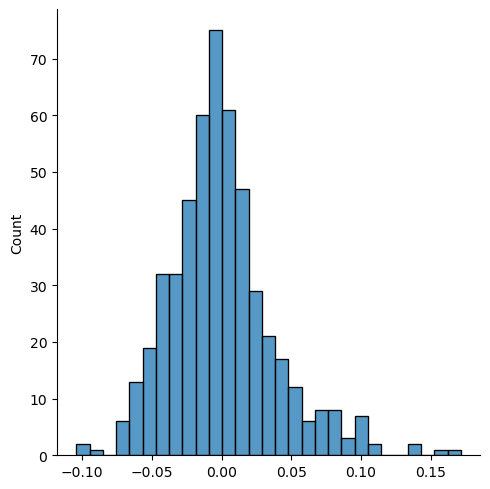

In [52]:
# compute the residuals by plotting a histogram
res = y_train - y_train_pred
sns.displot(res)

- As we can see our histogram as proper standard deviation of 0. So we can say that our predictor residuals are good.

## Now let's do Predictions & Evaluation on our test set

- We need to do same transformation on the test set which we did on the train set

In [53]:
# create a list of numeric variables (we haven't involved the binary variable & categorical dummy variables)
num_vars = ['cnt','casual', 'registered', 'temp', 'atemp', 'hum', 'windspeed']

# we will not fit the test set.
# we will directly transform the test set with our scaler as it will as already learned the mean/max values from training data set.

# Transform the test data 
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.describe()

,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Mist,weathersit_Partly Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.266372,0.527146,0.520592,0.255708,...,0.082192,0.086758,0.146119,0.178082,0.118721,0.100457,0.127854,0.164384,0.319635,0.652968
std,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.217246,0.217921,0.218435,0.437258,...,0.275286,0.282125,0.354034,0.383458,0.324202,0.301297,0.334692,0.371472,0.467403,0.477117
min,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.002133,0.059486,0.048205,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.101951,0.359154,0.377531,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.223712,0.526567,0.524275,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.362085,0.664742,0.672745,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,1.038708,0.985273,0.963300,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
y_test = df_test.pop('cnt')
X_test = df_test

In [55]:
# Add a constant to make prediction to X_test
X_test_sm = sm.add_constant(X_test)

In [56]:
# Now will drop the variables which are we have dropped from training set also as it will give us the error 
# when the our constant will try to multiply with our variables whiich are no their.

In [57]:
X_test_sm = X_test_sm.drop(["hum","weekday_Sun","mnth_Nov","holiday","mnth_Sept",
                            "weathersit_Partly Cloudy","season_spring","atemp","casual"], axis=1)

In [58]:
# Let's do prediction
y_test_pred = lr_model.predict(X_test_sm)

In [59]:
# now evaluate the model
# i.e. compute the r-squared
# for that will import the method r2_score from sklearn

from sklearn.metrics import r2_score

r2_score(y_true=y_test, y_pred=y_test_pred)

0.9520202142758549

### So from above r2_score we can say that our test data set is also performing well as the R-squared of our training data set is quite similar.

- So from above analysis we can get the below MLR equation for our predicted variables.
- ve coefficients in our model indicate that there is an inverse relationship between the independent variable and the dependent variable. 
- as the value of the independent variable decreases, the predicted value of the dependent variable tends to decrease as well, and vice versa.
- our +ve variables shows us that if some unit increase then our dependent variable also increase.

### EQUATION 

$ cnt = 0.0629−0.1094*workingday+0.1016*temp−0.0417*windspeed+0.9462*registered+0.0238*season_summer-0.0223*season_winter-0.0079*mnth_Aug-0.0194*mnth_Dec-0.0177*mnth_Feb-0.0131*mnth_Jan-0.0128*mnth_July-0.0145*mnth_June+0.0073*mnth_Mar-0.0119*mnth_May+0.0236*mnth_Oct+0.0004*weekday_Mon+0.0129*weekday_Sat-0.0045*yr_2019-0.0128*weekday_Thurs-0.0064*weekday_Tue-0.0093*weekday_Wed-0.0079*weathersit_Mist $

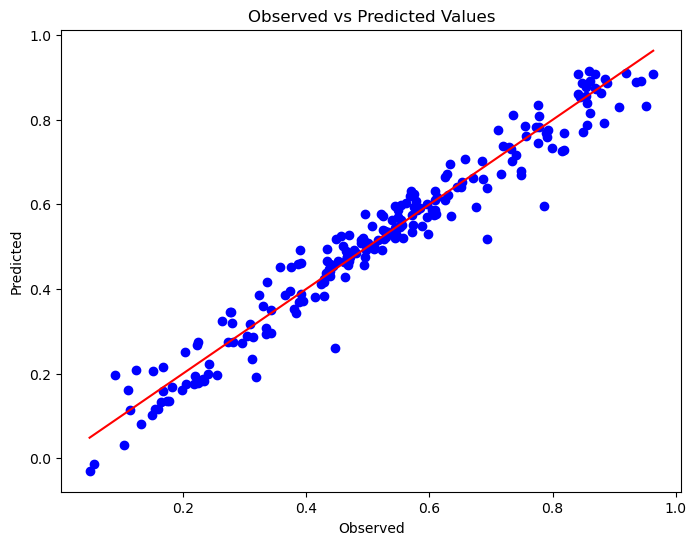

In [61]:
# Validating the assumptions of Linear Regression

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Plotting the diagonal line
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.title('Observed vs Predicted Values')
plt.show()

- As we can see that there is a linear relationship between our observed values & our predicted values. Our scatter plot shows that there is no voilation of linearity assumption